## Machine Learning 

#### 1. Import Libraries and Data
#### 2. Data Cleaning
#### 3. Data Preparation for Regression
#### 4. Regression Analysis

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
path = r'/Users/abrockk12.wv.us/Documents/Career Foundry/Brazilian E_Commerce'
path

'/Users/abrockk12.wv.us/Documents/Career Foundry/Brazilian E_Commerce'

In [5]:
# Import Data
df = pd.read_pickle(os.path.join(path, 'e_commerce_cleaner.pkl'))

In [6]:
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,declared_product_catalog_size,declared_monthly_revenue,first_contact_date,landing_page_id,origin,geolocation_city,geolocation_state,shipping_time,shipping_days,shipping_speed
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,...,NaN,NaN,NaT,nan,nan,campos dos goytacazes,RJ,8 days 01:58:13,8.0,Average Shipping
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,NaN,NaN,NaT,nan,nan,santa fe do sul,SP,16 days 16:59:11,16.0,Slow Shipping
3,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,NaN,NaN,NaT,nan,nan,pará de minas,MG,8 days 10:30:46,8.0,Average Shipping
5,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,...,NaN,NaN,NaT,nan,nan,atibaia,SP,6 days 15:22:21,6.0,Quick Shipping
6,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,...,NaN,NaN,NaT,nan,nan,varzea paulista,SP,25 days 14:32:18,25.0,Slow Shipping


In [7]:
%matplotlib inline

In [87]:
df.dtypes

order_id                                  object
order_item_id                              int64
product_id                                object
seller_id                                 object
shipping_limit_date                       object
price                                    float64
freight_value                            float64
payment_sequential                       float64
payment_type                              object
payment_installments                     float64
payment_value                            float64
review_id                                 object
review_score                             float64
review_comment_title                      object
review_comment_message                    object
review_creation_date              datetime64[ns]
review_answer_timestamp           datetime64[ns]
customer_id                               object
order_status                              object
order_purchase_timestamp                  object
order_approved_at   

In [88]:
sub = df[['price', 'payment_value', 'payment_type', 'product_category_name_english', 'geolocation_state', 'shipping_speed', 'shipping_days', 'review_score', 'freight_value', 'product_length_cm', 'product_width_cm', 'product_weight_g', 'order_approved_at']]

### Data Cleaning

In [89]:
# Check for nulls
sub.isnull().sum()

price                               0
payment_value                       3
payment_type                        0
product_category_name_english       0
geolocation_state                   0
shipping_speed                      0
shipping_days                       0
review_score                      824
freight_value                       0
product_length_cm                1537
product_width_cm                 1537
product_weight_g                 1537
order_approved_at                   0
dtype: int64

In [90]:
sub['payment_value'].fillna(sub['payment_value'].median(), inplace = True)

/var/folders/17/dzgpwljj3579pqd48l7mhty40000gn/T/ipykernel_91587/2407164516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['payment_value'].fillna(sub['payment_value'].median(), inplace = True)


In [91]:
sub.isnull().sum() # Leave review_score null because not all customers leave a review score, or have product measurments

price                               0
payment_value                       0
payment_type                        0
product_category_name_english       0
geolocation_state                   0
shipping_speed                      0
shipping_days                       0
review_score                      824
freight_value                       0
product_length_cm                1537
product_width_cm                 1537
product_weight_g                 1537
order_approved_at                   0
dtype: int64

#### Duplicated Values

In [54]:
# Check for duplicates
dups = sub.duplicated()

In [92]:
dups.shape # No dups

(110027,)

#### Extreme Values

/var/folders/17/dzgpwljj3579pqd48l7mhty40000gn/T/ipykernel_91587/3168889308.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sub['price'], bins = 60)
/Users/abrockk12.wv.us/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abrockk12.wv.us/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operatin

<Axes: xlabel='price', ylabel='Density'>

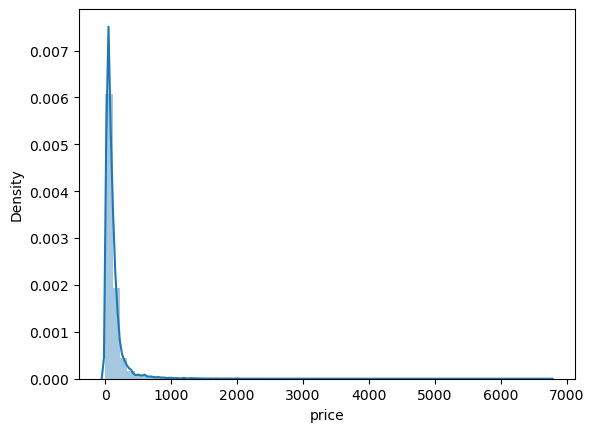

In [56]:
sns.distplot(sub['price'], bins = 60)

In [93]:
sub['us_payment'] = sub['payment_value']/5

/var/folders/17/dzgpwljj3579pqd48l7mhty40000gn/T/ipykernel_91587/1268403444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['us_payment'] = sub['payment_value']/5


In [94]:
no_extreme_values = sub[sub['us_payment']<1000]
no_extreme_values

,price,payment_value,payment_type,product_category_name_english,geolocation_state,shipping_speed,shipping_days,review_score,freight_value,product_length_cm,product_width_cm,product_weight_g,order_approved_at,us_payment
0,58.90,72.19,credit_card,cool_stuff,RJ,Average Shipping,8.0,5.0,13.29,28.0,14.0,650.0,2017-09-13 09:45:35,14.438
1,239.90,259.83,credit_card,pet_shop,SP,Slow Shipping,16.0,4.0,19.93,50.0,40.0,30000.0,2017-04-26 11:05:13,51.966
3,199.00,216.87,credit_card,furniture_decor,MG,Average Shipping,8.0,5.0,17.87,33.0,33.0,3050.0,2018-01-14 14:48:30,43.374
5,12.99,25.78,credit_card,perfumery,SP,Quick Shipping,6.0,4.0,12.79,16.0,15.0,200.0,2018-08-08 10:10:18,5.156
6,199.90,218.04,credit_card,garden_tools,SP,Slow Shipping,25.0,5.0,18.14,35.0,30.0,3750.0,2017-02-04 14:10:13,43.608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177468,299.99,343.40,boleto,housewares,MA,Slow Shipping,16.0,5.0,43.41,89.0,40.0,10150.0,2018-04-25 04:11:01,68.680
177470,350.00,386.53,boleto,computers_accessories,PR,Quick Shipping,7.0,5.0,36.53,45.0,38.0,8950.0,2018-07-17 04:31:48,77.306
177471,99.90,116.85,credit_card,sports_leisure,SP,Quick Shipping,4.0,5.0,16.95,21.0,19.0,967.0,2017-10-24 17:14:25,23.370
177473,55.99,64.71,credit_card,computers_accessories,SP,Quick Shipping,2.0,5.0,8.72,20.0,20.0,100.0,2017-08-15 00:04:32,12.942


/Users/abrockk12.wv.us/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abrockk12.wv.us/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='us_payment', ylabel='Count'>

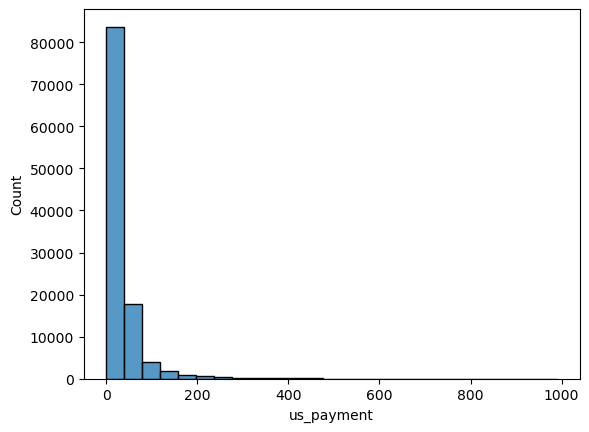

In [95]:
sns.histplot(no_extreme_values['us_payment'], bins = 25)

In [96]:
sub

,price,payment_value,payment_type,product_category_name_english,geolocation_state,shipping_speed,shipping_days,review_score,freight_value,product_length_cm,product_width_cm,product_weight_g,order_approved_at,us_payment
0,58.90,72.19,credit_card,cool_stuff,RJ,Average Shipping,8.0,5.0,13.29,28.0,14.0,650.0,2017-09-13 09:45:35,14.438
1,239.90,259.83,credit_card,pet_shop,SP,Slow Shipping,16.0,4.0,19.93,50.0,40.0,30000.0,2017-04-26 11:05:13,51.966
3,199.00,216.87,credit_card,furniture_decor,MG,Average Shipping,8.0,5.0,17.87,33.0,33.0,3050.0,2018-01-14 14:48:30,43.374
5,12.99,25.78,credit_card,perfumery,SP,Quick Shipping,6.0,4.0,12.79,16.0,15.0,200.0,2018-08-08 10:10:18,5.156
6,199.90,218.04,credit_card,garden_tools,SP,Slow Shipping,25.0,5.0,18.14,35.0,30.0,3750.0,2017-02-04 14:10:13,43.608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177468,299.99,343.40,boleto,housewares,MA,Slow Shipping,16.0,5.0,43.41,89.0,40.0,10150.0,2018-04-25 04:11:01,68.680
177470,350.00,386.53,boleto,computers_accessories,PR,Quick Shipping,7.0,5.0,36.53,45.0,38.0,8950.0,2018-07-17 04:31:48,77.306
177471,99.90,116.85,credit_card,sports_leisure,SP,Quick Shipping,4.0,5.0,16.95,21.0,19.0,967.0,2017-10-24 17:14:25,23.370
177473,55.99,64.71,credit_card,computers_accessories,SP,Quick Shipping,2.0,5.0,8.72,20.0,20.0,100.0,2017-08-15 00:04:32,12.942


In [62]:
sub['us_payment'].mean() # Check mean

35.36195313877503

In [63]:
sub['us_payment'].median() # Check median

22.484

In [64]:
sub['us_payment'].max() # Check max

2732.816

#### Data Prep for Regression Analysis

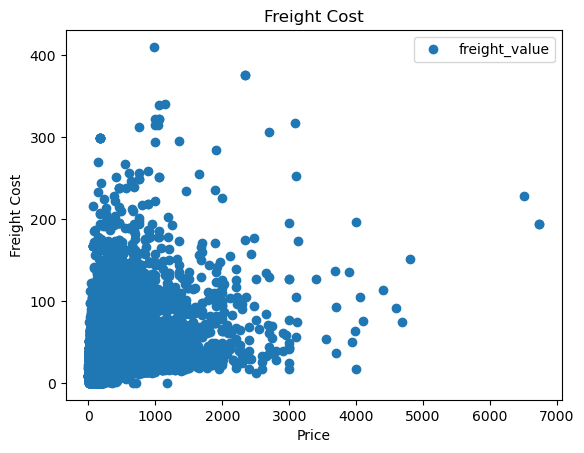

In [141]:
# Create a scatterplot using matplotlib
sub.plot(x = 'price', y = 'freight_value', style = 'o')
plt.title('Freight Cost')
plt.xlabel('Price')
plt.ylabel('Freight Cost')
plt.show()

#### Hypothesis
The higher the price, the higher the feight cost.

In [120]:
# Reshape the variables into NumPy arrays
X = sub['price'].values.reshape(-1,1)
y = sub['freight_value'].values.reshape(-1,1)

In [121]:
X

array([[ 58.9 ],
       [239.9 ],
       [199.  ],
       ...,
       [ 99.9 ],
       [ 55.99],
       [ 43.  ]])

In [111]:
y

array([[13.29],
       [19.93],
       [17.87],
       ...,
       [16.95],
       [ 8.72],
       [12.79]])

In [122]:
# Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Regression Analysis

In [123]:
# Create a regression object
regression = LinearRegression()

In [124]:
# Fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [125]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

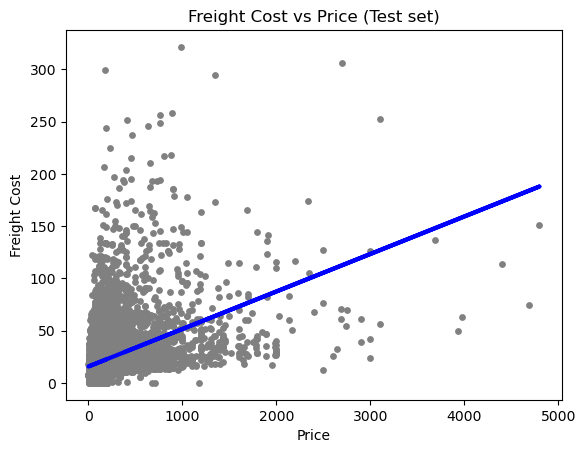

In [139]:
plot_test = plt
plot_test.scatter(X_test, y_test, color = 'gray', s = 15)
plot_test.plot(X_test, y_predicted, color='blue', linewidth = 3)
plot_test.title('Freight Cost vs Price (Test set)')
plot_test.xlabel('Price')
plot_test.ylabel('Freight Cost')
plot_test.show()

The line does not seem to fit very well to the data. The data appears to have a weak positive relationship.

In [127]:
# Create objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [128]:
# Print the model
print('Slope:', regression.coef_)
print('Mean squared erro:', rmse)
print('R2 score:', r2)

Slope: [[0.03588056]]
Mean squared erro: 201.22432314807034
R2 score: 0.16429366574400073


In [129]:
y_predicted

array([[21.97990226],
       [18.80447246],
       [19.62613734],
       ...,
       [19.64120718],
       [22.14100599],
       [29.87900815]])

In [132]:
# Create a dataframe comparing the actual and predicted
data = pd.DataFrame({'Actual:': y_test.flatten(), 'Predicted:': y_predicted.flatten()})
data.head(30)

,Actual:,Predicted:
0,18.80,21.979902
1,25.71,18.804472
2,10.96,19.626137
3,11.85,17.261249
4,19.23,17.333369
5,7.78,16.533233
6,15.14,21.061360
7,17.19,19.527466
8,17.63,17.329781
9,23.76,23.214194


In [133]:
# Predict
y_predicted_train = regression.predict(X_train)

In [134]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [136]:
print('Slope:', regression.coef_)
print('Mean squared error:', rmse)
print('R2 score:', r2)

Slope: [[0.03588056]]
Mean squared error: 206.11178345395518
R2 score: 0.17278702812655067


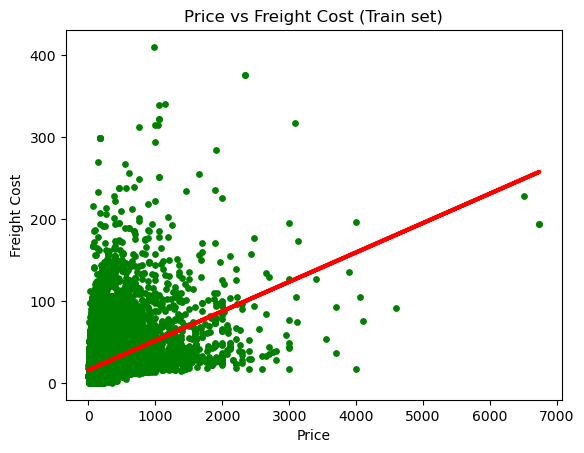

In [140]:
# Visualizing the training set results

plot_test = plt
plot_test.scatter(X_train, y_train, color = 'green', s = 15)
plot_test.plot(X_train, y_predicted_train, color = 'red', linewidth = 3)
plot_test.title('Price vs Freight Cost (Train set)')
plot_test.xlabel('Price')
plot_test.ylabel('Freight Cost')
plot_test.show()

The model fits the train set slightly better than the test set. This is good that the model did not overfit, but does insist that this is not a strong indicator of freight cost. 